In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install textdistance

In [0]:
!pip install stopwords

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for stopwords: filename=stopwords-0.1.3-py2.py3-none-any.whl size=37286 sha256=1b3b71eabfc0349448b925fe9665b0b0a5148fdbacf0403d04a0b92e0daf94fe
  Stored in directory: /root/.cache/pip/wheels/39/fa/c7/c4c5111e658f5c58465d948165dc3395a3c10ff57f4cd20356
Successfully built stopwords


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!pip install fuzzywuzzy

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
import textdistance as distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [0]:
data = pd.read_csv('/content/drive/My Drive/Copy of train.csv')

In [0]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [0]:
print('The total number of ros present in the ', data.shape[0])

The total number of ros present in the  404290


In [0]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


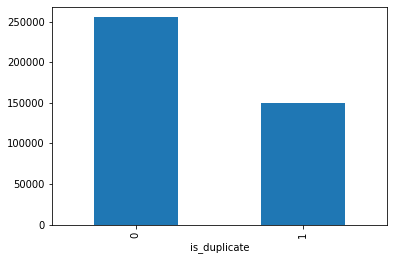

In [0]:
data.groupby('is_duplicate')['id'].count().plot.bar()

In [0]:
print('The total number of similar question is {}'.format(round(data['is_duplicate'].mean(),2)*100))
print('The total number of dis-similar is {} '.format(100-(round(data['is_duplicate'].mean(),2)*100)))

The total number of similar question is 37.0
The total number of dis-similar is 63.0 


In [0]:
ques_ids = pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
unique = len(np.unique(ques_ids))
ques_more_than_once = np.sum(ques_ids.value_counts()>1)
print('The number of question apperared more than once is {} and have {} %'.format(ques_more_than_once,(ques_more_than_once/unique)*100))
print('The maximum number of times when a question is appeares is {}'.format(np.max(ques_ids.value_counts())))
print('The number of unique questions is {}'.format(unique))

The number of question apperared more than once is 111780 and have 20.77953945937505 %
The maximum number of times when a question is appeares is 157
The number of unique questions is 537933


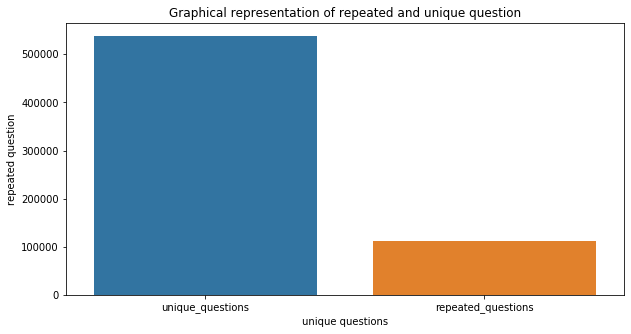

In [0]:
x=['unique_questions','repeated_questions']
y=[unique,ques_more_than_once]

plt.figure(figsize=(10,5))
plt.title('Graphical representation of repeated and unique question')
plt.xlabel('unique questions')
plt.ylabel('repeated question')
sns.barplot(x,y)
plt.show()

In [0]:
pair_duplicates=data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print('The duplicates pair present in the question answer pair if {}'.format(pair_duplicates.shape[0]-data.shape[0]))

The duplicates pair present in the question answer pair if 0


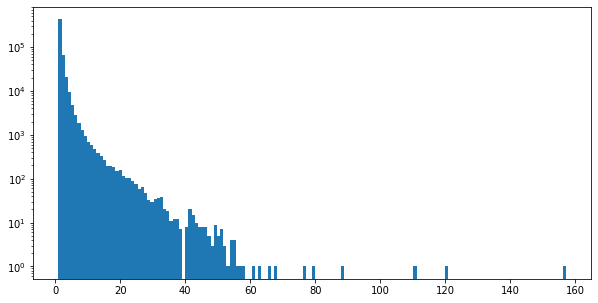

In [0]:
plt.figure(figsize=(10,5))
plt.hist(ques_ids.value_counts(),bins=160)
plt.yscale('log',nonposy='clip')
plt.show()

In [0]:
nan_rows = data[data.isnull().any(1)]
print(nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


In [0]:
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [0]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    data = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
    data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')
    data['q1len'] = data['question1'].str.len() 
    data['q2len'] = data['question2'].str.len()
    data['q1_n_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
    data['q2_n_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    data['word_Common'] = data.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    data['word_Total'] = data.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    data['word_share'] = data.apply(normalized_word_share, axis=1)

    data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
    data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])

    data.to_csv("df_fe_without_preprocessing_train.csv", index=False)

data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
print ("Minimum length of the questions in question1 : " , min(data['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(data['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", data[data['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", data[data['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


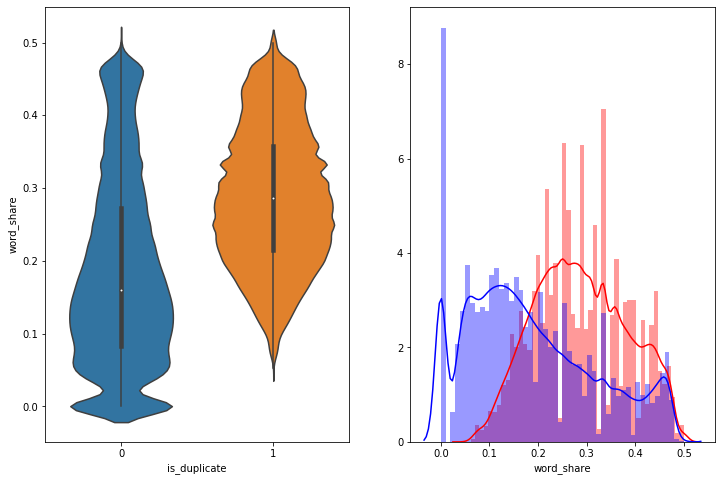

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

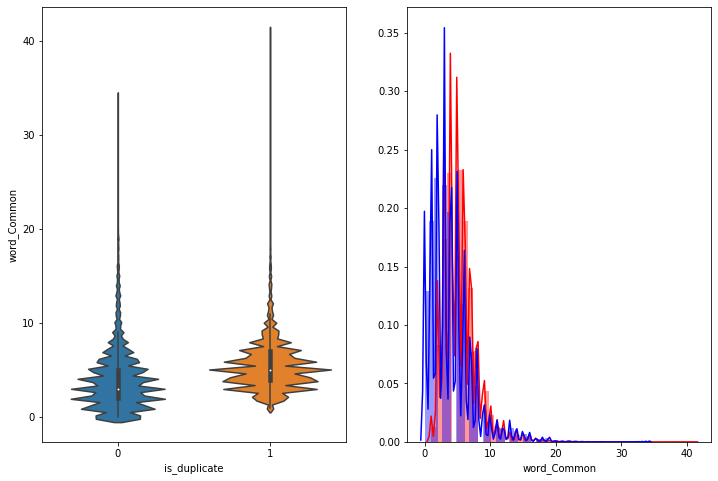

In [0]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

In [0]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    data = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    data = data.fillna('')
    data.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [0]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [0]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsstr(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(data):
    # preprocessing each question
    data["question1"] = data["question1"].fillna("").apply(preprocess)
    data["question2"] = data["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = data.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    data["cwc_min"]       = list(map(lambda x: x[0], token_features))
    data["cwc_max"]       = list(map(lambda x: x[1], token_features))
    data["csc_min"]       = list(map(lambda x: x[2], token_features))
    data["csc_max"]       = list(map(lambda x: x[3], token_features))
    data["ctc_min"]       = list(map(lambda x: x[4], token_features))
    data["ctc_max"]       = list(map(lambda x: x[5], token_features))
    data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    data["first_word_eq"] = list(map(lambda x: x[7], token_features))
    data["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    data["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    data["token_set_ratio"]       = data.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    data["token_sort_ratio"]      = data.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    data["fuzz_ratio"]            = data.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    data["fuzz_partial_ratio"]    = data.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return data

In [0]:
if os.path.isfile('nlp_features_train.csv'):
    data = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    data.fillna('')
else:
    print("Extracting features for train:")
    data = pd.read_csv("/content/drive/My Drive/Copy of train.csv")
    data = extract_features(data)
    data.to_csv("nlp_features_train.csv", index=False)
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.017241
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.019231


In [0]:
data.shape[1]

21

In [0]:
data_duplicate = data[data['is_duplicate'] == 1]
data_nonduplicate = data[data['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([data_duplicate["question1"], data_duplicate["question2"]]).flatten()
n = np.dstack([data_nonduplicate["question1"], data_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [0]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16110763
Total number of words in non duplicate pair questions : 33201102


Word Cloud for Duplicate Question pairs


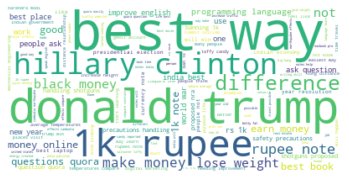

In [0]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pairs:


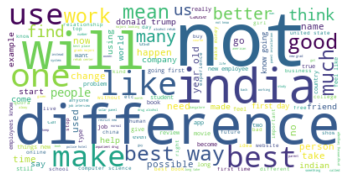

In [0]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

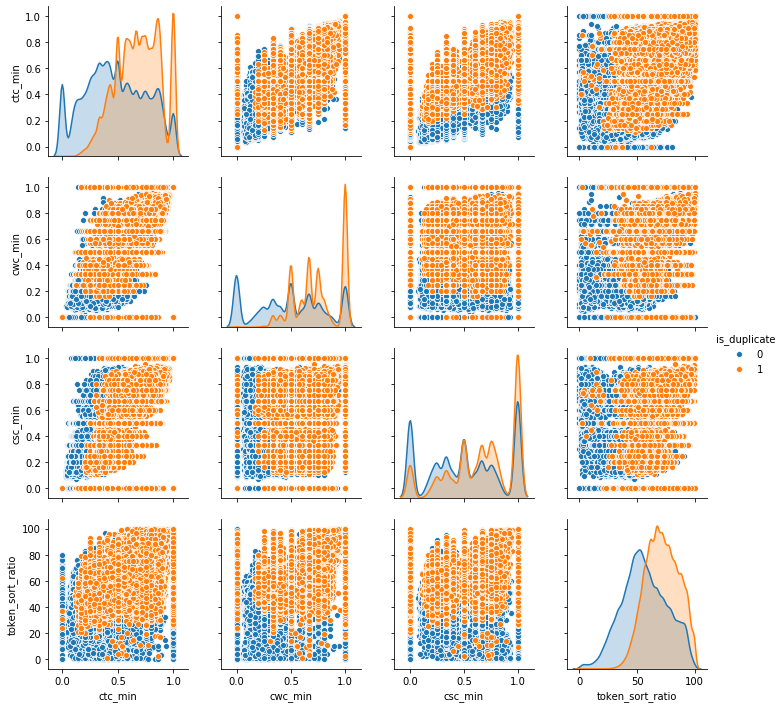

In [0]:

n = data.shape[0]
sns.pairplot(data[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

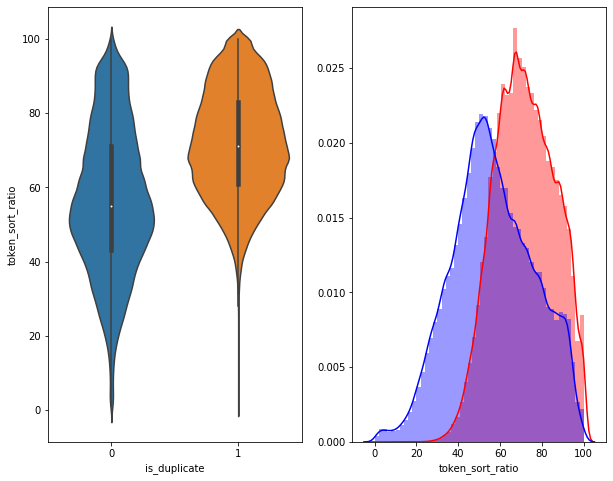

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

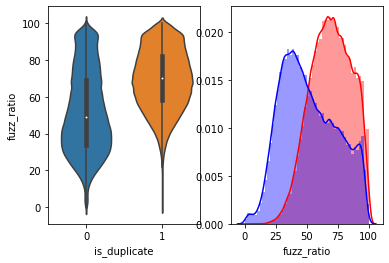

In [0]:

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = data[0:] , )

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [0]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

data_subsampled = data[0:5000]
X = MinMaxScaler().fit_transform(data_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = data_subsampled['is_duplicate'].values

In [0]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 0.348s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.129922
[t-SNE] Computed conditional probabilities in 0.285s
[t-SNE] Iteration 50: error = 81.3735657, gradient norm = 0.0439373 (50 iterations in 2.463s)
[t-SNE] Iteration 100: error = 70.5122452, gradient norm = 0.0090797 (50 iterations in 1.547s)
[t-SNE] Iteration 150: error = 68.6017532, gradient norm = 0.0058954 (50 iterations in 1.498s)
[t-SNE] Iteration 200: error = 67.6531830, gradient norm = 0.0056623 (50 iterations in 1.526s)
[t-SNE] Iteration 250: error = 67.1510086, gradient norm = 0.0034427

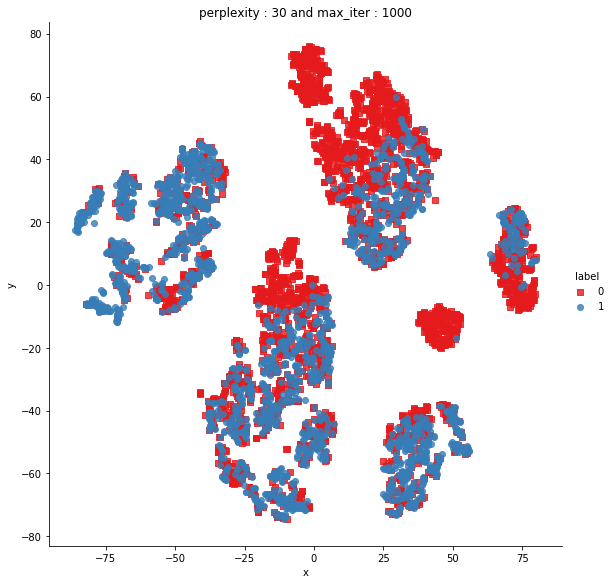

In [0]:
data = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=data, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [0]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='exact',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.017s...
[t-SNE] Computed neighbors for 5000 samples in 0.355s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.129922
[t-SNE] Computed conditional probabilities in 0.258s
[t-SNE] Iteration 50: error = 80.2503128, gradient norm = 0.0298772 (50 iterations in 11.021s)
[t-SNE] Iteration 100: error = 69.0582504, gradient norm = 0.0034668 (50 iterations in 5.456s)
[t-SNE] Iteration 150: error = 67.5875854, gradient norm = 0.0016618 (50 iterations in 4.741s)
[t-SNE] Iteration 200: error = 67.0329285, gradient norm = 0.0011499 (50 iterations in 4.739s)
[t-SNE] Iteration 250: error = 66.7156677, gradient norm = 0.000964

In [0]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [0]:
# avoid decoding problems
data = pd.read_csv("/content/drive/My Drive/Copy of train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
data['question1'] = data['question1'].apply(lambda x: str(x))
data['question2'] = data['question2'].apply(lambda x: str(x))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(data['question1']) + list(data['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))


In [0]:
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
mean_vec1 = np.zeros([10,10])

In [0]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(data['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
data['q1_feats_m'] = list(vecs1)

100%|██████████| 404290/404290 [47:53<00:00, 140.72it/s]


In [0]:
for question

In [0]:
vecs2 = []
for qu2 in tqdm(list(data['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
data['q2_feats_m'] = list(vecs2)

100%|██████████| 404290/404290 [48:12<00:00, 144.16it/s]


In [0]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = data.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [0]:

# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.017241
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.019231
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.016667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.019608
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.025000


In [0]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [0]:

# Questions 1 tfidf weighted word2vec
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,211.129864,-144.683059,-68.811247,-153.662141,-89.931593,2.311301,136.743747,50.449112,-64.150964,56.627526,70.148884,-19.668092,3.220435,-108.875797,61.560220,-83.830943,43.621516,114.621134,19.361845,116.752304,-110.904795,-104.655793,70.776944,266.029300,57.959328,94.104574,188.227136,-47.905627,40.152197,303.801049,53.047279,-1.010889,-166.091202,-30.814132,25.290403,22.995724,-68.330367,83.621365,-110.773904,38.606964,...,56.725948,-4.609248,-39.738396,196.880060,-49.277630,-169.070418,179.595977,-59.518374,9.319959,70.611649,-62.301108,95.722271,-93.060989,184.719507,39.616421,-53.016748,78.754825,103.623331,128.853304,200.878963,9.418689,72.890495,-155.806943,-124.938086,-44.380726,-99.382469,-189.679104,96.286983,3.966004,-48.648795,33.176593,-102.487002,144.595747,50.614258,-21.385940,36.385601,-70.999820,4.141466,-131.379525,71.884573
1,144.124685,-114.012484,-111.716694,-104.885038,-88.238478,16.441834,58.238013,102.095138,6.026966,178.498497,-22.003573,10.791894,-187.942327,-131.886144,53.476555,-120.873004,117.119611,209.002639,104.745780,82.015269,-67.366032,-152.282135,28.448090,196.723074,-41.048402,-27.583167,129.732189,-69.869688,60.635265,273.106264,128.834101,46.690212,13.195704,-35.669981,160.486912,89.043474,-112.731840,100.945506,75.614349,-70.645671,...,71.028835,83.799450,-201.194100,-35.934346,-120.343935,55.350533,132.726299,10.883411,-35.670799,80.078389,71.389960,-133.973739,-3.731305,-46.763965,9.160930,129.628878,72.256272,141.452563,2.176436,-8.807140,70.308457,-18.918405,3.955878,-109.197110,-135.522543,-104.224510,-238.053444,48.332183,63.791688,29.296462,67.386291,22.131810,40.210794,0.254035,98.600184,-36.436027,-123.609728,71.788337,-15.374614,-10.503958
2,81.757898,-142.184507,0.559867,-104.660084,-84.156631,22.515110,115.521661,50.436953,-111.740923,51.713310,-50.512388,3.029880,-101.605073,-124.537681,129.567171,-35.142460,66.920581,110.851539,19.244706,140.933759,-136.412045,-131.366463,180.824239,265.986679,7.573772,53.054180,32.404845,-40.288709,6.982227,178.159372,44.963908,-28.145689,-135.032690,-62.944629,105.237449,98.974474,-2.260294,89.970612,-12.494589,41.387744,...,54.768804,-20.600327,-71.733865,29.386397,-0.938005,-100.231185,88.304147,-78.633304,-31.012009,3.021985,-16.485088,92.326060,-111.473802,185.897607,-9.068853,-58.997920,29.293201,157.078950,100.438641,85.974096,-20.489402,-9.727843,-50.745659,-140.199320,55.960929,-2.548514,-141.338526,76.257999,-56.288086,29.954749,61.731855,-49.822495,107.080594,-11.431423,-40.667739,-26.771786,-12.482071,1.764694,-100.330459,148.061206
3,-126.651922,-59.747160,-67.763201,-138.114731,-101.038699,88.148523,-22.912261,85.941426,27.784233,50.810650,-64.085183,-1.990449,3.103386,31.170661,-73.118845,58.233994,-90.755115,25.278119,-50.849782,-56.944923,-157.596517,-50.896747,146.592772,103.181320,34.274884,85.545554,68.271444,61.822074,-75.803873,121.756886,-3.517907,11.074592,-110.385570,93.482724,62.452370,67.962872,81.283337,55.851768,-35.195467,-63.609127,...,46.228646,10.242953,6.355290,112.181208,-25.390530,113.004712,-33.447529,7.206453,76.463504,29.184045,78.303415,-40.678027,-60.314249,-83.142049,-7.011845,-37.584972,-141.788783,34.829037,30.101367,-30.264566,-74.522968,-102.248504,144.190824,163.620801,-7.952212,5.446319,-63.540029,17.786646,-76.093066,-21.006171,117.847457,-13.044505,-1.643167,78.158408,23.748127,12.945961,-8.807293,123.360096,64.057049,-24.943289
4,299.444044,-188.632001,-22.946291,-273.683355,-188.480395,107.123044,174.946302,-72.042341,-98.290527,137.439973,-72.358986,43.617779,-73.753283,-93.277156,114.165634,-158.453724,28.866031,118.178178,-4.618395,278.744146,-174.062236,-220.315422,131.314611,357.198732,159.095001,226.041228,114.182315,-48.687764,40.796250,393.043267

In [0]:
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,151.268526,-127.013168,-31.546286,-142.905807,-97.249094,9.485758,106.682259,36.754201,-36.541905,53.162199,57.798781,-34.539162,19.626286,-75.324668,73.160855,-75.943612,30.795570,89.649668,7.456815,104.710572,-89.255365,-92.446700,71.610017,237.232877,40.115430,64.232808,166.004508,-41.567455,45.424107,279.448449,19.880162,14.994184,-108.337972,-9.586054,14.642593,21.764268,-52.430637,66.028016,-79.345246,19.708894,...,63.459020,-6.311536,-21.760468,194.737497,-47.763672,-144.616534,153.968820,-40.945057,37.548652,41.647766,-73.519272,70.209004,-75.368039,156.349642,44.208612,-23.547798,69.883078,97.310878,125.984050,197.091046,-2.107076,76.050946,-122.895941,-84.888849,-35.973324,-82.526090,-160.285621,54.893650,-10.232465,-50.744309,28.763393,-108.306631,131.115633,42.530936,-14.726235,15.763654,-59.729557,-9.563384,-99.812549,57.643628
1,152.023095,-44.955390,-103.559249,-128.467601,-118.567610,44.577916,137.906144,26.984746,-78.328355,86.576880,-38.312126,-82.055423,-168.921524,-136.148574,13.828562,-67.919932,160.479399,222.381787,-54.984025,-42.837671,-59.291782,-163.251981,114.825004,158.406455,-47.784958,-71.926232,112.437219,-115.157175,85.453291,403.408967,150.566185,77.195489,31.371965,32.786803,257.702179,93.863829,-156.245194,133.518596,157.003578,-128.381275,...,112.687227,-15.581937,-264.369218,33.627755,-155.186128,128.838932,262.957780,24.868980,-23.468657,61.935278,30.281989,-97.138215,-6.737601,42.201864,11.454692,-7.226339,-55.998572,196.762083,56.418867,-24.148336,-27.707474,-44.380209,15.944973,-124.367160,-62.534570,-224.950485,-267.903211,97.299487,-55.366655,5.517342,117.588061,5.239833,56.622487,92.054093,141.063301,-30.466199,-25.418970,87.120086,-23.594506,7.936921
2,4.930220,-29.029581,-117.808812,-98.332275,-19.064096,-9.867805,141.808202,91.269564,50.727205,12.816846,22.755020,-61.095737,-96.926685,-107.221417,42.588726,4.387927,53.386532,68.774950,-31.636927,85.388483,-141.393116,-26.997678,114.337558,208.297437,-44.740873,28.577437,119.373177,-76.732412,5.204106,157.927217,8.645347,31.185043,-170.102781,3.163748,59.886647,-9.321814,-18.559612,10.939464,50.168880,-4.392919,...,20.251093,-12.533245,-145.274685,133.128196,-35.894020,16.601313,51.298792,-111.557811,-93.723447,21.036835,36.570152,76.936519,-135.184749,116.425427,-17.774938,-36.601950,-9.800254,154.311148,28.385146,157.381362,-0.202910,-4.943891,42.938207,-35.604127,-60.052574,-93.064247,-163.215306,125.819704,29.723694,-52.851137,128.699958,17.433420,58.203339,88.642941,-84.962783,71.462342,-10.853897,-59.501685,-99.425331,95.334773
3,-6.951929,-44.951731,-17.343082,-61.444452,-7.469152,16.942014,95.049250,-2.631600,-13.050916,-28.038393,28.901785,-37.439560,-96.333290,-54.729787,-49.528354,43.265676,-8.688619,34.214650,-4.497978,27.962733,-54.832524,-4.874446,90.271060,46.998673,43.779531,-39.946557,34.865285,14.978698,-9.556619,170.290531,68.847898,59.973762,-42.757395,82.483636,-2.758815,20.919674,-5.603089,-26.432023,-43.471311,-15.716046,...,14.860271,-30.326556,-137.106395,33.379686,13.509829,-7.759193,40.972374,-52.179422,-9.143602,-14.430484,94.654058,84.587984,12.978830,22.456387,16.013255,-64.677682,-11.589900,22.045068,11.084187,79.668263,-2.703853,-42.298158,60.377843,-21.285794,28.196993,-41.508922,-125.404171,-4.990982,-28.640298,-53.830178,70.475260,-31.174277,86.080290,49.967751,25.750448,-27.612377,24.050802,-3.504152,-46.115810,56.242265
4,96.174524,-71.613948,21.584882,-92.742468,-106.643129,10.646790,92.190157,-40.565982,-34.739525,56.340519,-25.369210,-36.866023,39.475739,-1.697243,-5.430449,-24.381379,24.277771,54.706064,9.671286,77.481152,-80.846779,-108.309709,109.374246,123.673887,74.688878,58.683550,135.712323,-31.796106,-9.458433,109.798301,3.445307,-44.953912,-29.610494,

In [0]:

print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 96
Number of features in question2 w2v  dataframe : 96
Number of features in final dataframe  : 221


In [0]:

# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

In [0]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

NameError: ignored

In [0]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [0]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [0]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [0]:
data.head(5)

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y


In [0]:

# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

IndexError: ignored

In [0]:

data.head()

In [0]:

# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

In [0]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

In [0]:
data = pd.read_csv('/content/final_features.csv')

In [0]:
data.head(5)

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.017241,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,211.129864,-144.683059,-68.811247,-153.662141,-89.931593,2.311301,136.743747,50.449112,-64.150964,56.627526,70.148884,...,63.459020,-6.311536,-21.760468,194.737497,-47.763672,-144.616534,153.968820,-40.945057,37.548652,41.647766,-73.519272,70.209004,-75.368039,156.349642,44.208612,-23.547798,69.883078,97.310878,125.984050,197.091046,-2.107076,76.050946,-122.895941,-84.888849,-35.973324,-82.526090,-160.285621,54.893650,-10.232465,-50.744309,28.763393,-108.306631,131.115633,42.530936,-14.726235,15.763654,-59.729557,-9.563384,-99.812549,57.643628
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.019231,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,144.124685,-114.012484,-111.716694,-104.885038,-88.238478,16.441834,58.238013,102.095138,6.026966,178.498497,-22.003573,...,112.687227,-15.581937,-264.369218,33.627755,-155.186128,128.838932,262.957780,24.868980,-23.468657,61.935278,30.281989,-97.138215,-6.737601,42.201864,11.454692,-7.226339,-55.998572,196.762083,56.418867,-24.148336,-27.707474,-44.380209,15.944973,-124.367160,-62.534570,-224.950485,-267.903211,97.299487,-55.366655,5.517342,117.588061,5.239833,56.622487,92.054093,141.063301,-30.466199,-25.418970,87.120086,-23.594506,7.936921
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.016667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,81.757898,-142.184507,0.559867,-104.660084,-84.156631,22.515110,115.521661,50.436953,-111.740923,51.713310,-50.512388,...,20.251093,-12.533245,-145.274685,133.128196,-35.894020,16.601313,51.298792,-111.557811,-93.723447,21.036835,36.570152,76.936519,-135.184749,116.425427,-17.774938,-36.601950,-9.800254,154.311148,28.385146,157.381362,-0.202910,-4.943891,42.938207,-35.604127,-60.052574,-93.064247,-163.215306,125.819704,29.723694,-52.851137,128.699958,17.433420,58.203339,88.642941,-84.962783,71.462342,-10.853897,-59.501685,-99.425331,95.334773
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.019608,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,-126.651922,-59.747160,-67.763201,-138.114731,-101.038699,88.148523,-22.912261,85.941426,27.784233,50.810650,-64.085183,...,14.860271,-30.326556,-137.106395,33.379686,13.509829,-7.759193,40.972374,-52.179422,-9.143602,-14.430484,94.654058,84.587984,12.978830,22.456387,16.013255,-64.677682,-11.589900,22.045068,11.084187,79.668263,-2.703853,-42.298158,60.377843,-21.285794,28.196993,-41.508922,-125.404171,-4.990982,-28.640298,-53.830178,70.475260,-31.174277,86.080290,49.967751,25.750448,-27.612377,24.050802,-3.504152,-46.115810,56.242265
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.025000,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,299.444044,-188.632001,-22.946291,-273.683355,-188.480395,107.123044,174.946302,-72.042341,-98.290527,137.439973,-72.358986,...,-0.059322,-2.319858,45.244015,86.204404,-104.057546,-79.668501,68.855648,-5.118222,-12.008303,50.085484,-73.365283,29.960261,-33.990113,38.043692,55.964678,-41.883756,28.133676,114.105409,80.610007,33.632165,-38.473972,-59.547091,-103.305947,-16.661958,-18.814710,-90.139482,-54.822026,130.925742,-34.736859,-31.797693,18.852815,-70.416546,87.693604,38.386024,-14.003138,-12.975101,46.318846,-25.159640,-53.098664,-2.351894


In [0]:
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [0]:
data.head(5)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.016667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,81.757898,-142.184507,0.559867,-104.660084,-84.156631,22.515110,115.521661,50.436953,-111.740923,51.713310,-50.512388,3.029880,-101.605073,-124.537681,...,20.251093,-12.533245,-145.274685,133.128196,-35.894020,16.601313,51.298792,-111.557811,-93.723447,21.036835,36.570152,76.936519,-135.184749,116.425427,-17.774938,-36.601950,-9.800254,154.311148,28.385146,157.381362,-0.202910,-4.943891,42.938207,-35.604127,-60.052574,-93.064247,-163.215306,125.819704,29.723694,-52.851137,128.699958,17.433420,58.203339,88.642941,-84.962783,71.462342,-10.853897,-59.501685,-99.425331,95.334773
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.019608,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,-126.651922,-59.747160,-67.763201,-138.114731,-101.038699,88.148523,-22.912261,85.941426,27.784233,50.810650,-64.085183,-1.990449,3.103386,31.170661,...,14.860271,-30.326556,-137.106395,33.379686,13.509829,-7.759193,40.972374,-52.179422,-9.143602,-14.430484,94.654058,84.587984,12.978830,22.456387,16.013255,-64.677682,-11.589900,22.045068,11.084187,79.668263,-2.703853,-42.298158,60.377843,-21.285794,28.196993,-41.508922,-125.404171,-4.990982,-28.640298,-53.830178,70.475260,-31.174277,86.080290,49.967751,25.750448,-27.612377,24.050802,-3.504152,-46.115810,56.242265
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.025000,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,299.444044,-188.632001,-22.946291,-273.683355,-188.480395,107.123044,174.946302,-72.042341,-98.290527,137.439973,-72.358986,43.617779,-73.753283,-93.277156,...,-0.059322,-2.319858,45.244015,86.204404,-104.057546,-79.668501,68.855648,-5.118222,-12.008303,50.085484,-73.365283,29.960261,-33.990113,38.043692,55.964678,-41.883756,28.133676,114.105409,80.610007,33.632165,-38.473972,-59.547091,-103.305947,-16.661958,-18.814710,-90.139482,-54.822026,130.925742,-34.736859,-31.797693,18.852815,-70.416546,87.693604,38.386024,-14.003138,-12.975101,46.318846,-25.159640,-53.098664,-2.351894
5,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,81,77,73,73,0.011494,1,1,86,90,16,16,8.0,31.0,0.258065,2,0,105.989180,-202.810714,-1.734132,-119.056935,-127.485003,-48.630905,218.338885,131.916775,-58.184426,180.355087,-48.795763,-9.447814,-209.062923,-184.335751,...,105.159553,28.745069,-248.822811,-74.532890,-55.616758,-2.747140,24.939733,-49.477200,-19.781320,160.570804,95.314553,-129.019356,-31.961362,-28.004828,28.169689,78.339730,151.296764,252.262878,32.814938,12.330411,33.367159,105.710010,15.305564,-130.501190,-164.800931,-191.308089,-253.281379,25.128960,70.683517,-7.079547,140.383325,31.584976,-52.553733,-17.341836,174.319444,27.591935,-57.281026,-11.223623,-83.622666,83.007612
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.0,7.5,24,23,20,42,0.050000,1,1,19,62,4,11,0.0,14.0,0.000000,2,0,-50.411580,-23.510991,-69.295673,-123.641681,-95.864822,25.529506,-50.959428,31.277076,35.817611,38.486916,-21.414975,70.163954,-24.904083,38.987935,...,53.729064,95.186892,-37.055737,-17.086843,-140.836018,-33.081198,134.457582,-123.403842,71.519208,95.662275,-85.947783,-16.080494,-165.852140,-14.752866,17.312506,-73.034384,-2.787635,74.601926,85.660402,53.000171,-21.139264,-153.328466,-42.870905,-52.324202,-67.623283,-151.261781,12.068840,13.895191,-74.121

In [0]:
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [0]:

# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

In [0]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [0]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283001, 218)
Number of data points in test data : (121287, 218)


In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6307998911664623 Class 1:  0.3692001088335377
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Test Data using Random Model 0.8867653768070085


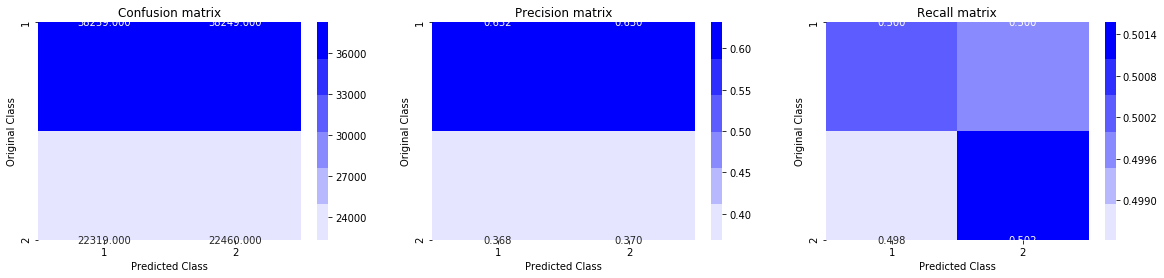

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.4455247756647585
For values of alpha =  0.0001 The log loss is: 0.4496590721475506
For values of alpha =  0.001 The log loss is: 0.44995360047562105
For values of alpha =  0.01 The log loss is: 0.43561193531823333
For values of alpha =  0.1 The log loss is: 0.44611154485127114
For values of alpha =  1 The log loss is: 0.4862528819411774
For values of alpha =  10 The log loss is: 0.5171852526291554


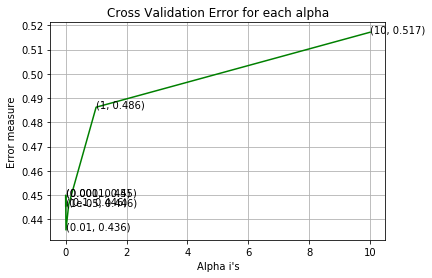

For values of best alpha =  0.01 The train log loss is: 0.4359541417769477
For values of best alpha =  0.01 The test log loss is: 0.43561193531823333
Total number of data points : 121287


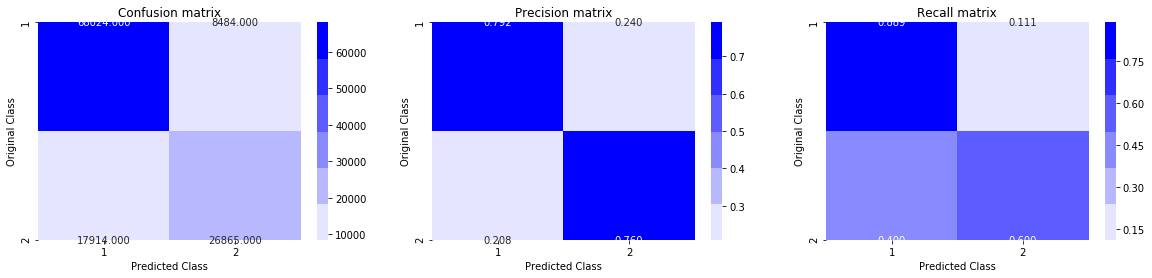

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.6585278256672462
For values of alpha =  0.0001 The log loss is: 0.6585278256672462
For values of alpha =  0.001 The log loss is: 0.6585278256672462
For values of alpha =  0.01 The log loss is: 0.4871234580229767
For values of alpha =  0.1 The log loss is: 0.5467161040489427
For values of alpha =  1 The log loss is: 0.6322235494979133
For values of alpha =  10 The log loss is: 0.6527984737143144


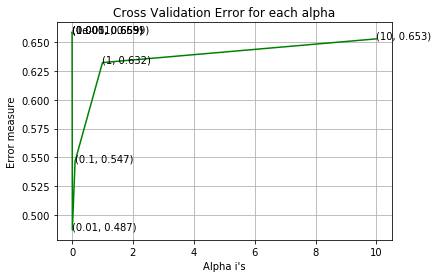

For values of best alpha =  0.01 The train log loss is: 0.48724462025959925
For values of best alpha =  0.01 The test log loss is: 0.4871234580229767
Total number of data points : 121287


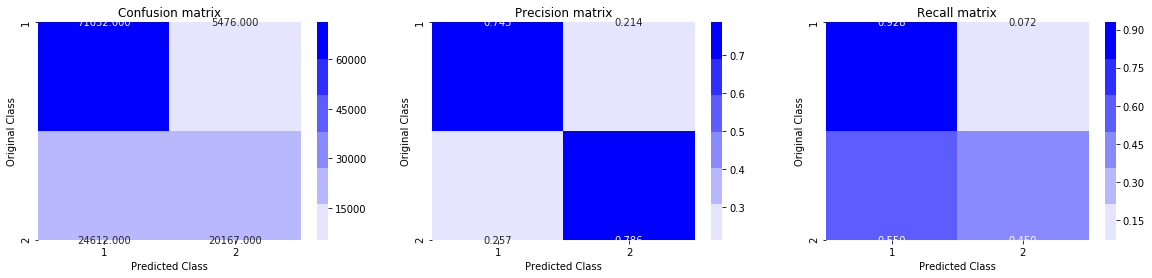

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684866	valid-logloss:0.684852
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61487	valid-logloss:0.614966
[20]	train-logloss:0.564264	valid-logloss:0.564458
[30]	train-logloss:0.526124	valid-logloss:0.526389
[40]	train-logloss:0.497084	valid-logloss:0.497432
[50]	train-logloss:0.474069	valid-logloss:0.474508
[60]	train-logloss:0.455706	valid-logloss:0.456317
[70]	train-logloss:0.441056	valid-logloss:0.44177
[80]	train-logloss:0.429095	valid-logloss:0.429945
[90]	train-logloss:0.419601	valid-logloss:0.420566
[100]	train-logloss:0.411544	valid-logloss:0.41263
[110]	train-logloss:0.404724	valid-logloss:0.40591
[120]	train-logloss:0.39912	valid-logloss:0.400396
[130]	train-logloss:0.394302	valid-logloss:0.39568
[140]	train-logloss:0.390223	valid-logloss:0.391682
[150]	train-logloss:0.387096	valid-logloss:0.388649
[160]	train-logloss:0.384089	valid

Total number of data points : 121287


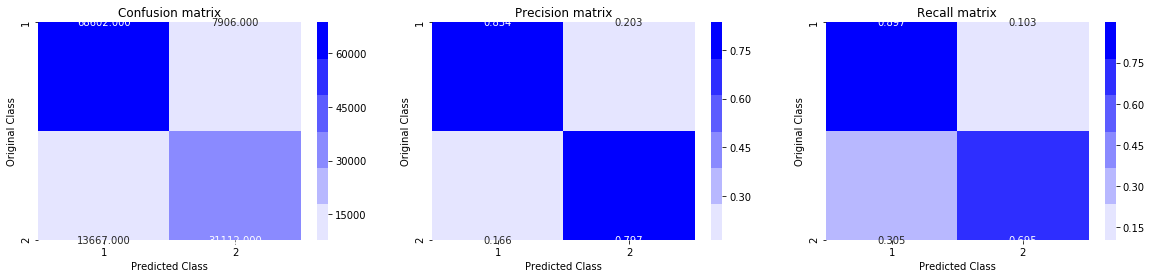

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [0]:
data.head(5)